# Matplotlib basic tools
Here we will see some basic functionality of plotting with Matplotlib library.

<div>
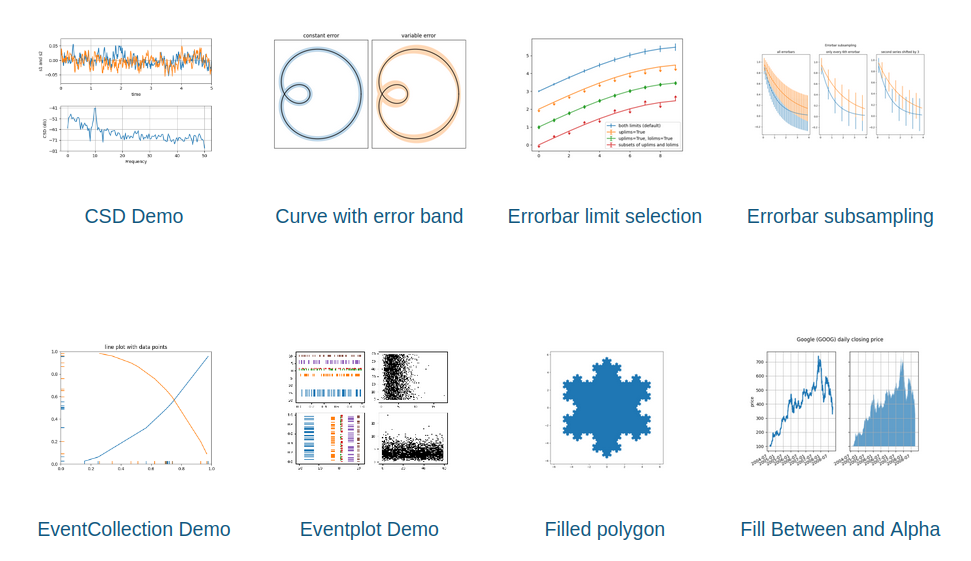
</div>

Tutorials:
- https://matplotlib.org/stable/tutorials/introductory/pyplot.html
- https://www.tutorialspoint.com/matplotlib/index.htm

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
# btw why .pyplot?

# matplotlib.use(backend, *, force=True)[source]

#    Select the backend used for rendering and GUI integration.
# this regards to a Jupyter interaction
%matplotlib inline
# %matplotlib notebook

# Family of plots 

https://matplotlib.org/stable/plot_types/index.html


**Plot**

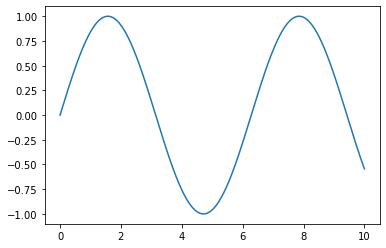

In [5]:
# plot
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x));

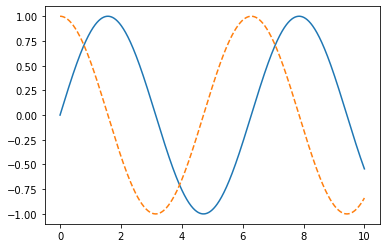

In [4]:
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

**Scatter plot**

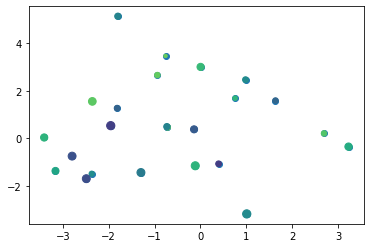

In [7]:
x1 = np.random.normal(0, 2, 24)
x2 = np.random.normal(0, 2, len(x1))
plt.scatter(x1, x2);

# size and color:
sizes = np.random.uniform(10, 70, len(x1))
colors = np.random.uniform(15, 80, len(x1))

plt.scatter(x1, x2, s=sizes, c=colors, vmin=0, vmax=100)

**Bar plot**

Bar plot vs. histogram: what's the difference? 

https://www.cuemath.com/questions/what-is-the-difference-between-a-bar-graph-and-a-histogram/

<BarContainer object of 8 artists>

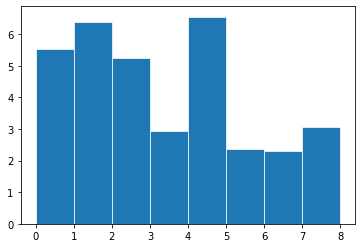

In [53]:
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

plt.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

**Stem plot**

<StemContainer object of 3 artists>

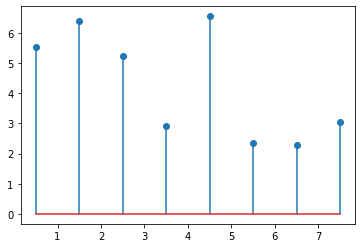

In [54]:
plt.stem(x,y);

**Step plot**

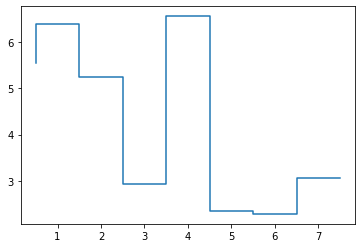

In [55]:
plt.step(x,y);

**Fill between**

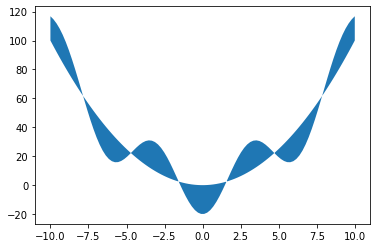

In [56]:
x = np.linspace(-10, 10, 100)
y1 = x**2
y2 = x**2 - 20*np.cos(x)

plt.fill_between(x, y1, y2);

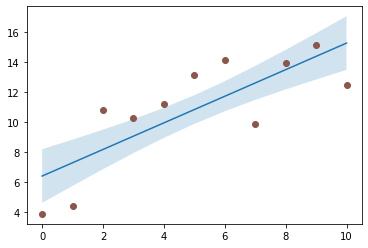

In [9]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')


## 2d plots 

In [10]:
# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 30), np.linspace(-3, 3, 30))
Z = (1 - X/5 + X**3 + Y**5) * np.exp(-X**2 - Y**2)

**Show 2d image**

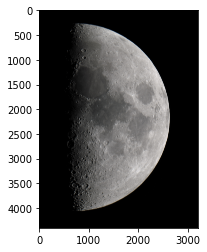

In [21]:
import matplotlib.image as mpimg 
moon = mpimg.imread('moon.jpg') 

plt.imshow(moon)

In [24]:
# It has 3 color channels
moon.shape

(4400, 3200, 3)

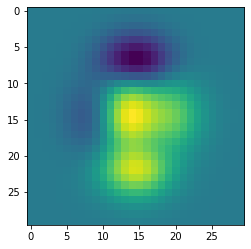

In [11]:
plt.imshow(Z)

**Pcolormesh**

Create a pseudocolor plot with a non-regular rectangular grid.

Imshow vs. pcolormesh vs. pcolor

https://thomas-cokelaer.info/blog/2014/05/matplotlib-difference-between-pcolor-pcolormesh-and-imshow/

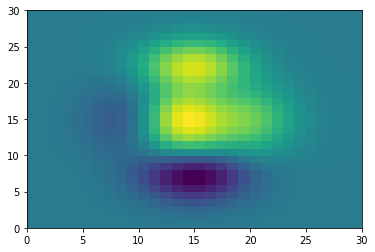

In [88]:
plt.pcolormesh(Z)

**Contour plots**

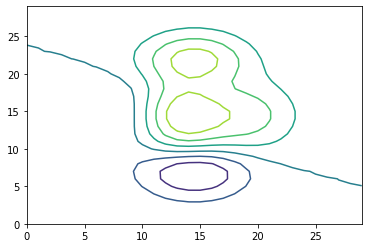

In [89]:
plt.contour(Z)

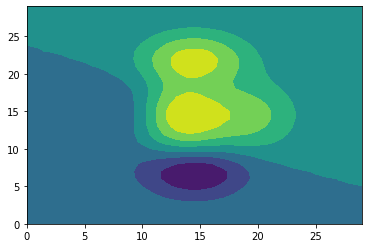

In [90]:
plt.contourf(Z)

**2D field**

In [95]:
# Plot a 2D field of barbs
# X, Y define the barb locations, U, V define the barb directions

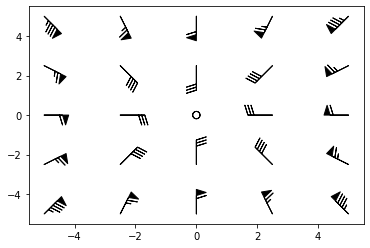

In [93]:
x = np.linspace(-5, 5, 5)
X, Y = np.meshgrid(x, x)
U, V = 12 * X, 12 * Y

data = [(-1.5, .5, -6, -6),
        (1, -1, -46, 46),
        (-3, -1, 11, -11),
        (1, 1.5, 80, 80),
        (0.5, 0.25, 25, 15),
        (-1.5, -0.5, -5, 40)]

data = np.array(data, dtype=[('x', np.float32), ('y', np.float32),
                             ('u', np.float32), ('v', np.float32)])

plt.barbs(X, Y, U, V)

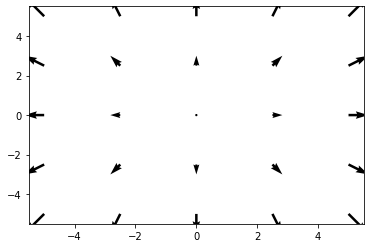

In [96]:
plt.quiver(X, Y, U, V)

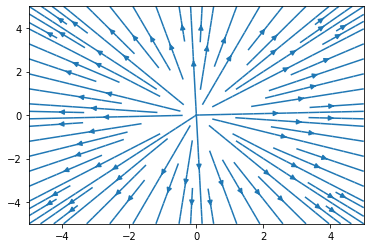

In [97]:
plt.streamplot(X, Y, U, V)

## Real data

Data Available from the Minor Planet Center

source: https://minorplanetcenter.net/data

url file: https://www.minorplanetcenter.net/Extended_Files/neocp.json 
        
Explanations: Objects awaiting further observations to confirm as NEOs 

In [26]:
import json
json_file = 'neocp.json'

with open(json_file, "r") as file:
    df = pd.read_json(file)
    
df.head(5)

,Temp_Desig,Score,Discovery_year,Discovery_month,Discovery_day,R.A.,Decl.,V,Updated,NObs,Arc,H,Not_Seen_dys
0,I63E1If,100,2020,2,4.3,22.2116,35.2371,29.5,Added Feb. 10.68 UT,7,0.03,30.7,8.017
1,ZTF0D86,100,2020,2,7.5,18.6784,18.1084,20.7,Updated Feb. 10.68 UT,4,0.05,21.9,4.817
2,P10XEUN,75,2020,2,5.6,13.4532,-29.2894,21.8,Updated Feb. 10.68 UT,7,0.75,15.7,5.997
3,P10XEUM,60,2020,2,5.6,13.3793,-29.8693,21.7,Updated Feb. 10.68 UT,10,0.79,14.1,5.954
4,P10XDg0,78,2020,2,5.5,11.5316,42.1530,21.1,Updated Feb. 10.68 UT,6,0.79,16.8,6.017


### Statistic plots 

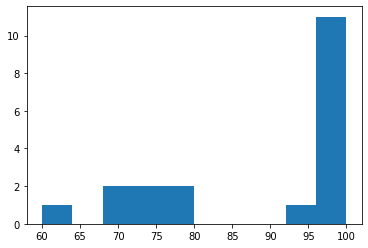

In [29]:
# histogram
plt.hist(df['Score'], bins=10);

**Boxplot**

https://en.wikipedia.org/wiki/Box_plot

In [116]:
#      Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
#                   |-----:-----|
#   o      |--------|     :     |--------|    o  o
#                   |-----:-----|
# flier             <----------->            fliers
#                        IQR

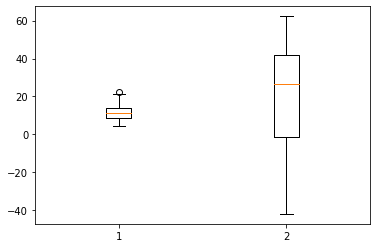

In [113]:
plt.boxplot((df['R.A.'], df['Decl.']));

Violinplot

ttps://en.wikipedia.org/wiki/Violin_plot

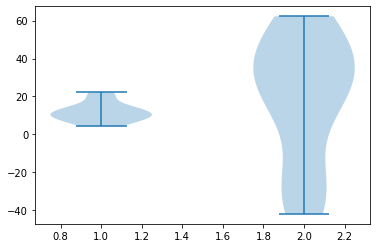

In [117]:
# violinplot
plt.violinplot((df['R.A.'], df['Decl.']));

<ErrorbarContainer object of 3 artists>

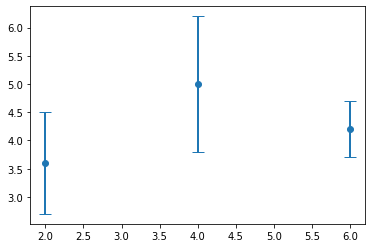

In [119]:
# errorbar
np.random.seed(1)
x = [2, 4, 6]
y = [3.6, 5, 4.2]
yerr = [0.9, 1.2, 0.5]

plt.errorbar(x, y, yerr, fmt='o', linewidth=2, capsize=6)

**2D histogram**

To analyse the relationship between 2 numerical variables

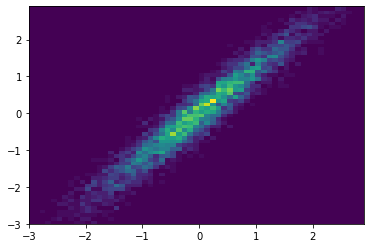

In [33]:
# hist2d
x = np.random.randn(5000)
y = 1.2 * x + np.random.randn(5000) / 3
plt.hist2d(x, y, bins=(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1)));

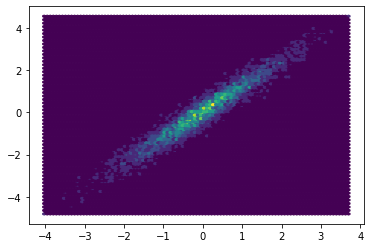

In [34]:
# hexbin
plt.hexbin(x, y, bins = 10)

*And there are many more...

# Figure hierarchy 

https://www.janmeppe.com/blog/Plotting-with-Matplotlib/

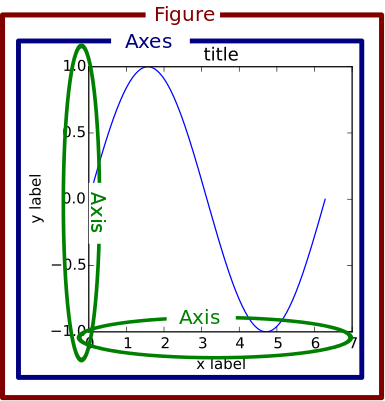

#  Two styles of subploting

- https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html 

In [35]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'some x')

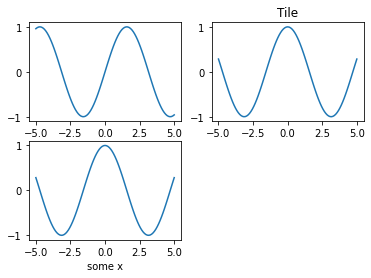

In [43]:
# Matlab subplot style
x = np.linspace(-5, 5, 99)

fig = plt.subplot(2,2,1)
plt.plot(x, np.sin(x));

plt.subplot(2,2,2)
plt.plot(x, np.cos(x));
plt.title('Tile')

plt.subplot(2,2,3)
plt.plot(x, np.cos(x));
plt.xlabel('some x')

Text(0.5, 1.0, 'hELLO')

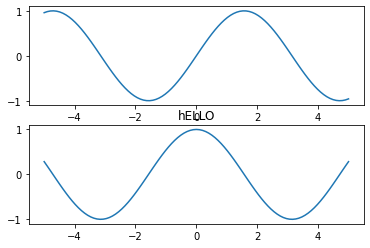

In [140]:
# create a plot figure
plt.figure()

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))
# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));
plt.title('hELLO')

**OOP subplot style**

(2, 3)


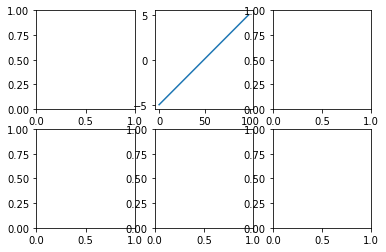

In [57]:
f, ax = plt.subplots(2,3)
print(ax.shape)
ax[0,1].plot(x)

Text(0.5, 1.0, 'cos')

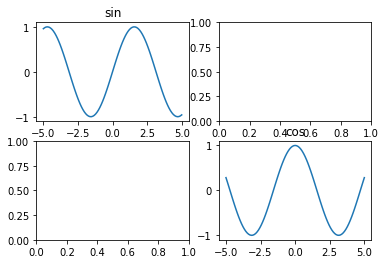

In [16]:
# first create an object: a canva with several plot windows
fig, axs = plt.subplots(2, 2)

# then each graphic is a method for this window 
axs[0,0].plot(x, np.sin(x));
axs[0,0].set_title('sin')
axs[1,1].plot(x, np.cos(x));
axs[1,1].set_title('cos')


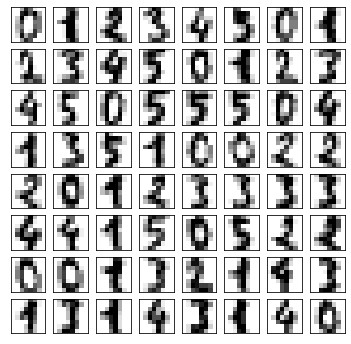

In [30]:
# Subplotting via loop

# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [62]:
# save figure 
fig.savefig('my_fig.png')

In [32]:
# if write a script, then use 
plt.show()

# Styling 


- axes
    - limits, relation
- title and subtitles  
    - font, size, location
- axes labels
    - font, size, location
- axes ticks 
    - font, size, position
- legends and colorbars
    - font, size, location
- lines and markers
    - color, size, type
- grids
- colors and backgrounds
    - palletes, transparency
- annotations and texts 
    - fonts, sizes, positions


https://matplotlib.org/stable/gallery/showcase/anatomy.html?highlight=showcase%20example%20code%20anatomy%20py


<div>
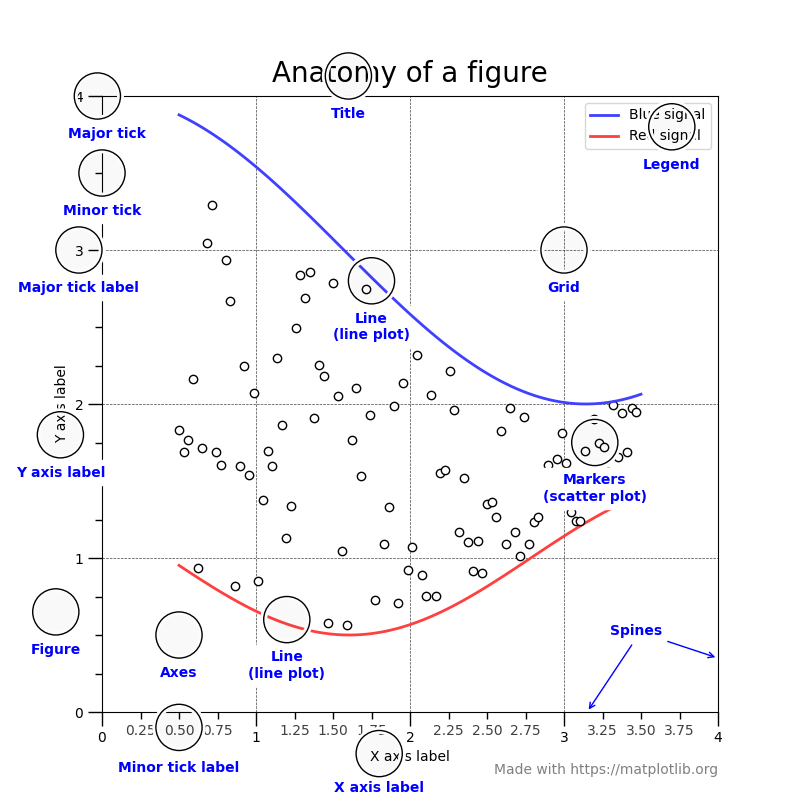
</div>

### Markers 

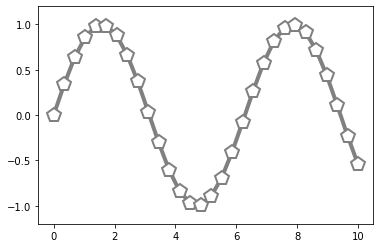

In [58]:
# more marker style 
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 
         '-p',
         color='gray',
         markersize=15, 
         linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

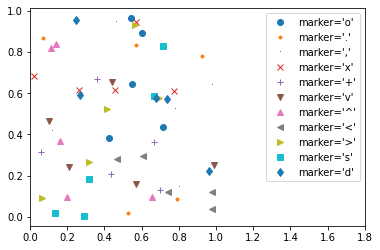

In [19]:
# markers diversity
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
    label="marker='{0}'".format(marker))
    plt.legend(numpoints=1)
    plt.xlim(0, 1.8)

### Titles, text, annotations, arrows 

Dataset can be downloaded from
https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?locations=UA

In [13]:
# help(pd.read_csv)

In [59]:
CO2 = pd.read_csv('CO2UA.csv', header=2)
CO2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.631696,208.837879,226.081890,214.785217,207.626699,185.213644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,...,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,...,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,...,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380,NaN,NaN,NaN


In [75]:
# Find our country
'UKR' in CO2['Country Code'].values

co2ua = CO2[CO2['Country Code'].str.contains('UKR')].drop(['Country Name','Country Code','Indicator Name','Indicator Code'],1)
co2ua = co2ua.iloc[0].dropna()
co2ua.index

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

In [98]:
# Plot adjusment as a dictionary
# use names of the specific plot parameters 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

Text(3, 10, 'Crisis')

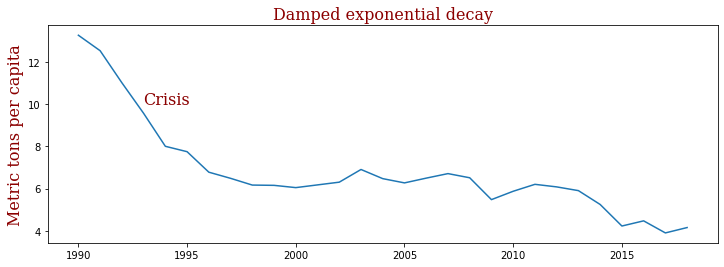

In [112]:
fig, ax = plt.subplots(figsize=(12, 4))

co2ua.plot(); # plot with pandas 

# Label the axes with default settings
# ax.set_title('CO2 emissions in Ukraine')

# Add text with our dictionary for styling
ax.set_title('Damped exponential decay', **font)
ax.set_ylabel('Metric tons per capita',  **font)
ax.text(3, 10, 'Crisis', **font)

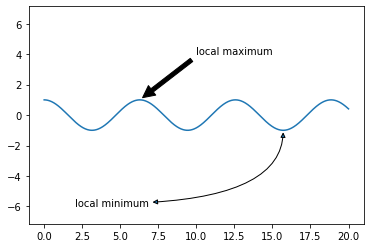

In [116]:
# Nice arrows
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), 
            arrowprops=dict(facecolor='black', shrink=0.05))


ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="<|-|>",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

### Styles

In [119]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

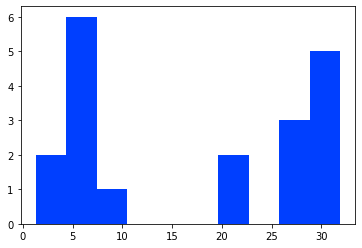

In [120]:
plt.style.use('seaborn-bright')
plt.hist(df['Discovery_day']);

https://www.dunderdata.com/blog/view-all-available-matplotlib-styles

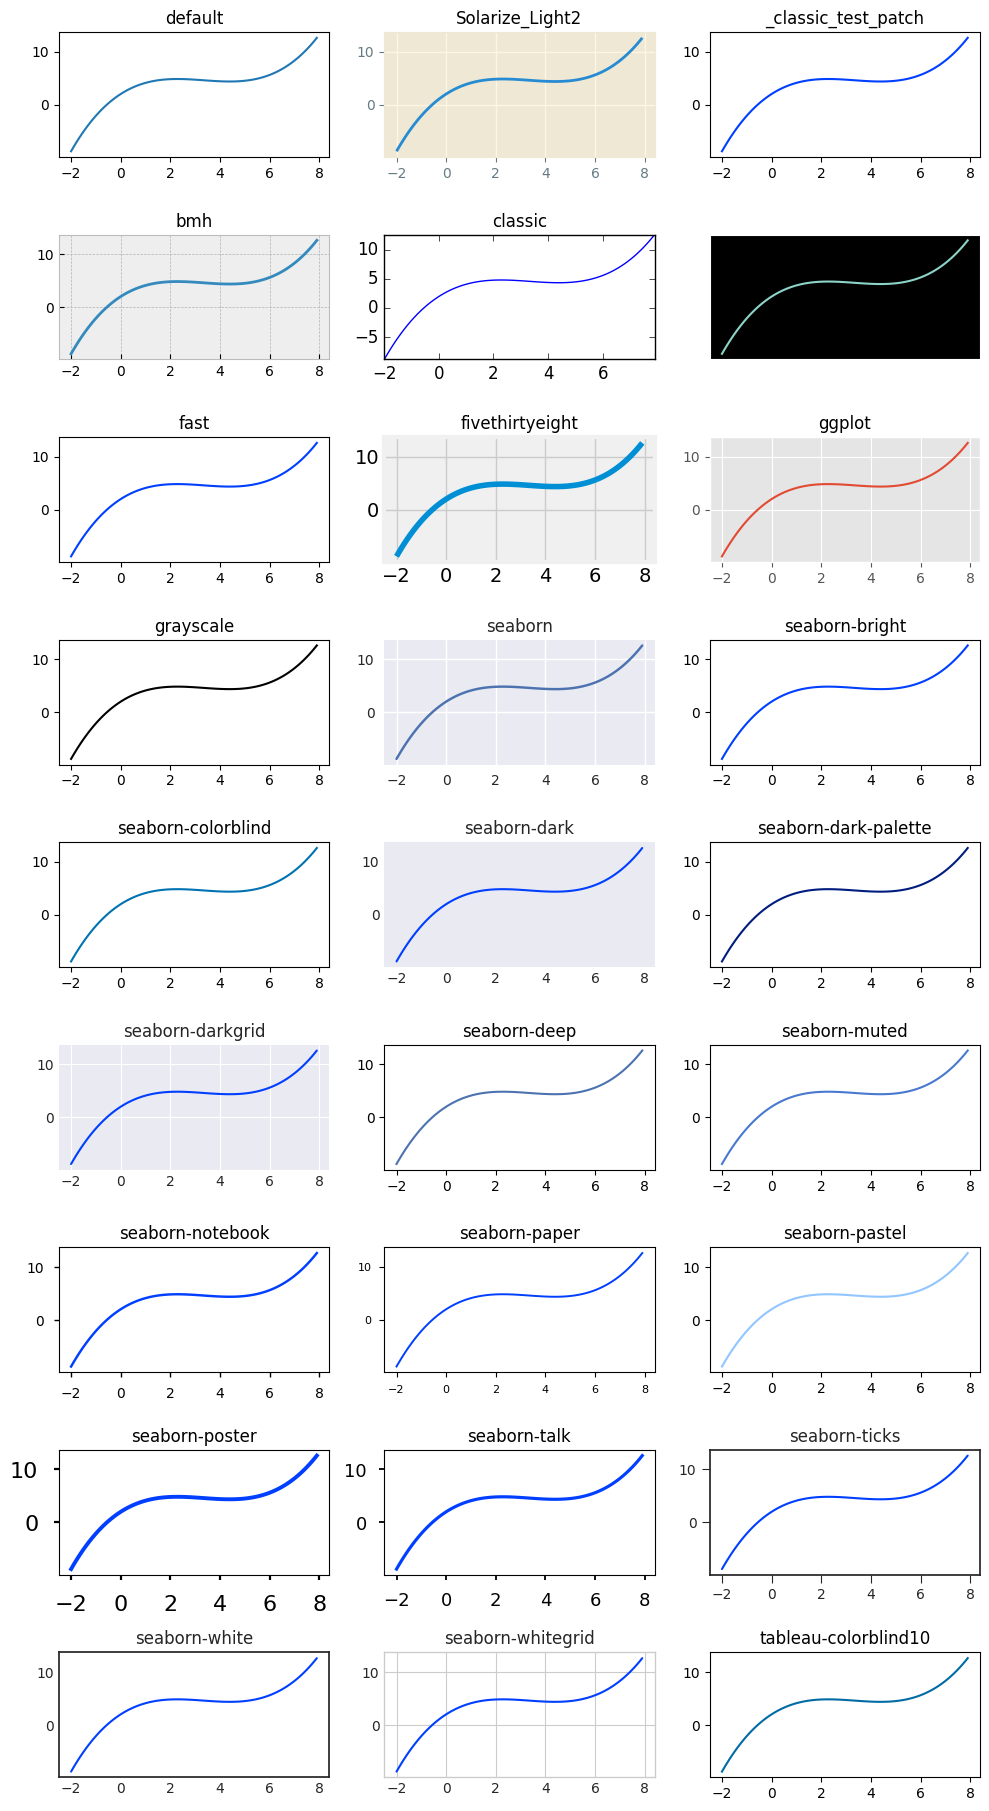

In [123]:
x = np.arange(-2, 8, .1)
y = .1 * x ** 3 - x ** 2 + 3 * x + 2

fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(10, 3, i + 1)
        ax.plot(x, y)
    ax.set_title(style)

# Bonus 

https://www.python-graph-gallery.com/